# Лабораторная работа по Feature Selection

Цель лабораторной работы получить практические знания по работе с признаками на известном датасете статистики самоубийств.

Вам необходимо будет подготовить данные для обучения линейной модели предсказания количества самоубийств (столбец - suicides/100k pop).

Чек-лист:
0. Изучите файл annotation.txt. Там содержится информация о датасете.
1. Загрузите датасет data.csv.
2. Посмотрите на данные. Отобразите общую информацию по признакам (вспомните о describe и info). Напишите в markdown свои наблюдения.
3. Выявите пропуски, а также возможные причины их возникновения. Решите, что следует сделать с ними. Напишите в markdown свои наблюдения.
4. Оцените зависимости переменных между собой. Используйте корреляции. Будет хорошо, если воспользуетесь profile_report. Напишите в markdown свои наблюдения.
5. Определите стратегию преобразования категориальных признаков (т.е. как их сделать адекватными для моделей).
6. Найдите признаки, которые можно разделить на другие, или преобразовать в другой тип данных. Удалите лишние, при необходимости.
7. Разделите выборку на обучаемую и тестовую.
8. Обучите линейную модель. Напишите в markdown свои наблюдения по полученным результатам.

Если возникнут затруднения, то смотрите на материал практических занятий. Данного там должно хватить для выполнения всех пунктов. Желаю успеха!

In [1]:
%matplotlib inline

import re
import numpy as np
import pandas as pd
import pandas_profiling
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import (OneHotEncoder, LabelEncoder)
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('data.csv')

df.shape

(27820, 10)

In [3]:
df.head()

,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 10 columns):
sex                   27820 non-null object
age                   27820 non-null object
suicides_no           27820 non-null int64
population            27820 non-null int64
suicides/100k pop     27820 non-null float64
country-year          27820 non-null object
HDI for year          8364 non-null float64
 gdp_for_year ($)     27820 non-null object
gdp_per_capita ($)    27820 non-null int64
generation            27820 non-null object
dtypes: float64(2), int64(3), object(5)
memory usage: 2.1+ MB


In [5]:
df.describe()

,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


### Описание общей картины

**Полнота данных** - данные представлены в довольно чистом виде, нет битых данных, замечание есть только по столбцу "HDI for year". Этот столбец отвечает за общий уровень развития в стране.

**Качество данных** - опираясь на значения квартилей, ощущается сильный разброс практически во всех столбцах.

### Исследуем столбец "HDI for year"

In [6]:
df.loc[65:80]

,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
65,male,15-24 years,6,242200,2.48,Albania1994,NaN,"1,985,673,798",697,Generation X
66,female,15-24 years,6,282600,2.12,Albania1994,NaN,"1,985,673,798",697,Generation X
67,female,25-34 years,4,261100,1.53,Albania1994,NaN,"1,985,673,798",697,Boomers
68,female,35-54 years,2,342500,0.58,Albania1994,NaN,"1,985,673,798",697,Boomers
69,female,55-74 years,1,174600,0.57,Albania1994,NaN,"1,985,673,798",697,Silent
70,male,5-14 years,1,371800,0.27,Albania1994,NaN,"1,985,673,798",697,Millenials
71,female,5-14 years,0,344400,0.00,Albania1994,NaN,"1,985,673,798",697,Millenials
72,male,25-34 years,13,232900,5.58,Albania1995,0.619,"2,424,499,009",835,Generation X
73,male,55-74 years,9,178000,5.06,Albania1995,0.619,"2,424,499,009",835,Silent
74,female,75+ years,2,40800,4.90,Albania1995,0.619,"2,424,499,009",835,G.I. Generation


In [7]:
df.loc[535:550]

,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
535,male,25-34 years,0,6325,0.0,Antigua and Barbuda2009,NaN,"1,224,253,000",14335,Generation X
536,male,35-54 years,0,12978,0.0,Antigua and Barbuda2009,NaN,"1,224,253,000",14335,Boomers
537,male,5-14 years,0,8599,0.0,Antigua and Barbuda2009,NaN,"1,224,253,000",14335,Generation Z
538,male,55-74 years,0,4349,0.0,Antigua and Barbuda2009,NaN,"1,224,253,000",14335,Silent
539,male,75+ years,0,1042,0.0,Antigua and Barbuda2009,NaN,"1,224,253,000",14335,Silent
540,female,15-24 years,0,8435,0.0,Antigua and Barbuda2012,0.781,"1,211,411,704",13657,Millenials
541,female,25-34 years,0,7215,0.0,Antigua and Barbuda2012,0.781,"1,211,411,704",13657,Millenials
542,female,35-54 years,0,15193,0.0,Antigua and Barbuda2012,0.781,"1,211,411,704",13657,Generation X
543,female,5-14 years,0,8401,0.0,Antigua and Barbuda2012,0.781,"1,211,411,704",13657,Generation Z
544,female,55-74 years,0,5512,0.0,Antigua and Barbuda2012,0.781,"1,211,411,704",13657,Boomers


In [8]:
df[df['country-year'].str.contains('Antigua')]


,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
264,female,15-24 years,0,7709,0.0,Antigua and Barbuda1985,NaN,"240,923,926",3850,Generation X
265,female,25-34 years,0,6344,0.0,Antigua and Barbuda1985,NaN,"240,923,926",3850,Boomers
266,female,35-54 years,0,6173,0.0,Antigua and Barbuda1985,NaN,"240,923,926",3850,Silent
267,female,5-14 years,0,7339,0.0,Antigua and Barbuda1985,NaN,"240,923,926",3850,Generation X
268,female,55-74 years,0,3778,0.0,Antigua and Barbuda1985,NaN,"240,923,926",3850,G.I. Generation
...,...,...,...,...,...,...,...,...,...,...
583,male,25-34 years,0,7059,0.0,Antigua and Barbuda2015,NaN,"1,364,863,037",14853,Millenials
584,male,35-54 years,0,13370,0.0,Antigua and Barbuda2015,NaN,"1,364,863,037",14853,Generation X
585,male,5-14 years,0,8268,0.0,Antigua and Barbuda2015,NaN,"1,364,863,037",14853,Generation Z
586,male,55-74 years,0,5784,0.0,Antigua and Barbuda2015,NaN,"1,364,863,037",14853,Boomers


Сравнив несколько срезов, можно предположить, что заполненность столбца "HDI for year" в какой то степени зависит от страны и года, где проводилось исследование. Но это не означает, что ближе к нынешнему году у всех стран признак будет заполнен.

**Гипотеза** - мне кажется, что в менее развитых странах Индекс человеческого развития (HDI for year) начали считать намного позже, чем в более развитых странах.

**Следствие** - чтобы не потерять ценность данного признака, для каждой страны я заполню это значение медианой из выборки по стране.

In [9]:
df['country-year'] = df['country-year'].str.lower()
df.head()

,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,male,15-24 years,21,312900,6.71,albania1987,NaN,"2,156,624,900",796,Generation X
1,male,35-54 years,16,308000,5.19,albania1987,NaN,"2,156,624,900",796,Silent
2,female,15-24 years,14,289700,4.83,albania1987,NaN,"2,156,624,900",796,Generation X
3,male,75+ years,1,21800,4.59,albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,male,25-34 years,9,274300,3.28,albania1987,NaN,"2,156,624,900",796,Boomers


In [10]:
df['country'] = df['country-year'].str.replace('\d', '')
df['year'] = df['country-year'].str.replace('\D', '').astype(int)

df.head()

,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation,country,year
0,male,15-24 years,21,312900,6.71,albania1987,NaN,"2,156,624,900",796,Generation X,albania,1987
1,male,35-54 years,16,308000,5.19,albania1987,NaN,"2,156,624,900",796,Silent,albania,1987
2,female,15-24 years,14,289700,4.83,albania1987,NaN,"2,156,624,900",796,Generation X,albania,1987
3,male,75+ years,1,21800,4.59,albania1987,NaN,"2,156,624,900",796,G.I. Generation,albania,1987
4,male,25-34 years,9,274300,3.28,albania1987,NaN,"2,156,624,900",796,Boomers,albania,1987


In [11]:
countries = df['country'].unique()
len(countries)

101

In [12]:
for country in countries:
    country_slice = df['country'] == country
    
    if True in country_slice:
        nan_indexes = df[country_slice & df['HDI for year'].isna()].index
        df.loc[nan_indexes, 'HDI for year'] = df[country_slice]['HDI for year'].median()
    
df.head()

D:\Soft\Anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1076: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation,country,year
0,male,15-24 years,21,312900,6.71,albania1987,0.6755,"2,156,624,900",796,Generation X,albania,1987
1,male,35-54 years,16,308000,5.19,albania1987,0.6755,"2,156,624,900",796,Silent,albania,1987
2,female,15-24 years,14,289700,4.83,albania1987,0.6755,"2,156,624,900",796,Generation X,albania,1987
3,male,75+ years,1,21800,4.59,albania1987,0.6755,"2,156,624,900",796,G.I. Generation,albania,1987
4,male,25-34 years,9,274300,3.28,albania1987,0.6755,"2,156,624,900",796,Boomers,albania,1987


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
sex                   27820 non-null object
age                   27820 non-null object
suicides_no           27820 non-null int64
population            27820 non-null int64
suicides/100k pop     27820 non-null float64
country-year          27820 non-null object
HDI for year          26334 non-null float64
 gdp_for_year ($)     27820 non-null object
gdp_per_capita ($)    27820 non-null int64
generation            27820 non-null object
country               27820 non-null object
year                  27820 non-null int32
dtypes: float64(2), int32(1), int64(3), object(6)
memory usage: 2.4+ MB


Теперь столбец "country-year" нам не нужен, от него можно избавиться

In [14]:
df.drop('country-year', axis=1, inplace=True)

Окей, у нас теперь большинство пропущенных данных заполнено более менее по-человечески. Но пропуски остались всё равно. Это связано с тем, что для какой-то страны в общем этот признак не собирался и это проблема. Теперь нужно решить, удалять в общем страну или что-то попытаться придумать.

Посмотрим, что это за страна такая

In [15]:
df[df['HDI for year'].isna()]['country'].unique()

array(['aruba', 'cabo verde', 'dominica', 'kiribati', 'macau', 'mongolia',
       'puerto rico', 'republic of korea', 'russian federation',
       'saint kitts and nevis', 'san marino'], dtype=object)

Как ни странно, это сразу с десяток стран. В РФ Индекс человеческого развития так же не определен \*facepalm\*
Видимо, придётся таки добавить категориальную переменную, обозначающую наличие этого признака, а пустые значения я заполню...
\*долго думает\*

...значением взятым из первого квартиля по всей выборке, т.к. взять среднее - не верно, признак очень важный, взять минимальное тоже вроде как не верно, поэтому именно первый квартиль

In [16]:
df.loc[df[df['HDI for year'].isna()].index, 'HDI for year'] = df['HDI for year'].quantile([0.25]).values[0]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 11 columns):
sex                   27820 non-null object
age                   27820 non-null object
suicides_no           27820 non-null int64
population            27820 non-null int64
suicides/100k pop     27820 non-null float64
HDI for year          27820 non-null float64
 gdp_for_year ($)     27820 non-null object
gdp_per_capita ($)    27820 non-null int64
generation            27820 non-null object
country               27820 non-null object
year                  27820 non-null int32
dtypes: float64(2), int32(1), int64(3), object(5)
memory usage: 2.2+ MB


Теперь пропусков нет

### Карта зависимости переменных

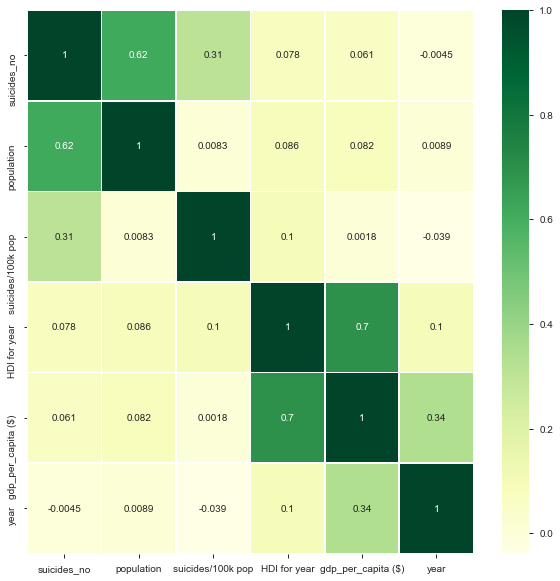

In [17]:
plt.figure(figsize=(10, 10))

sns.heatmap(df.corr(), annot=True, cmap='YlGn', linewidths=.5)
plt.show()

Отрицательных корреляций нет. Из карты теплоты видно, что довольно сильная корелляция между:
- кол-вом суицидов (suicides_no) и популяцией в общей (population);
- ВВП на душу населения (gdp_per_capita) и Индексом человеческого развития (HDI for year)

### Стратегия преобразования категориальных признаков

Чтобы мне было проще выбрать наилучшую стратегию преобразования категориальных переменных, я преобразую  "gdp_for_year ($)" к числу

In [18]:
df[' gdp_for_year ($) '] = df[' gdp_for_year ($) '].str.strip().str.replace(',', '').astype('int64')

Теперь я воспользуюсь профайлером. Он покажет мне кол-во уникальных значений в каждой из переменных и я смогу оценить, как стоит преобразовывать ту или иную переменную

In [19]:
df.profile_report(style={ 'full_width': True })

- Из данных профайлера видно, что количество нулевых значений преобладает у таких полей, как "suicides/100k_pop" и "suicides_no". К счастью, кол-во нулевых значений совпадает, поэтому это можно принять за норму.

- Переменная sex будет преобразована к булеву типу (0 or 1)

- Поле "generation" можно преобразовать к категориям по значению при помощи OneHotEncoding, т.к. их всего 6 уникальных видов

- Поле "age" тоже можно преобразовать к категориальному значению при помощи OneHotEncoding, т.к. их всего 6 уникальных групп

- Поле "country" я не могу преобразовать к категориальному виду при помощи OneHotEncoding... Я склоняюсь к тому, чтобы воспользоваться LabelEncoding т.к. это преобразует название страны к коду страны, что в мире - нормальное явление. Мне кажется, это нормально скажется на качестве модели. P.S. простите, Артур, я помню, Вы говорили, что LabelEncoding бесполезный, но что поделать со страной я не знаю =(

In [20]:
def one_hot_encode_new_columns(df: pd.DataFrame, col_name: str):
    """
    Function get source DataFrame and column name and make OneHotEncoding transformation
    of the column. Function generate column names with values of the column and the column name.
    
    This function return DataFrame with only new columns
    """
    enc = OneHotEncoder(categories='auto')
    
    encoded_data = enc.fit_transform(
        np.array( df[col_name] ).reshape(-1, 1)
    ).todense()
    
    encoded_feature_names = list(map(lambda val: re.sub(r'^.+_', f'{col_name}_', val), enc.get_feature_names()))
    
    return pd.DataFrame(data=encoded_data, columns=encoded_feature_names)

In [21]:
ohe_col_names = ['generation', 'age']

df_ohe = pd.concat([
    df,
    *map(lambda col_name: one_hot_encode_new_columns(df, col_name), ohe_col_names)
], sort=False, axis=1)

df_ohe.drop(ohe_col_names, axis=1, inplace=True)

df_ohe.head()

,sex,suicides_no,population,suicides/100k_pop,HDI_for_year,_gdp_for_year_($)_,gdp_per_capita_($),country,year,generation_Boomers,...,generation_Generation X,generation_Generation Z,generation_Millenials,generation_Silent,age_15-24 years,age_25-34 years,age_35-54 years,age_5-14 years,age_55-74 years,age_75+ years
0,male,21,312900,6.71,0.6755,2156624900,796,albania,1987,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,male,16,308000,5.19,0.6755,2156624900,796,albania,1987,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,female,14,289700,4.83,0.6755,2156624900,796,albania,1987,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,male,1,21800,4.59,0.6755,2156624900,796,albania,1987,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,male,9,274300,3.28,0.6755,2156624900,796,albania,1987,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [22]:
df_ohe['sex'] = df_ohe['sex'].str.contains('female').astype('int8')

In [23]:
df_ohe.head()

,sex,suicides_no,population,suicides/100k_pop,HDI_for_year,_gdp_for_year_($)_,gdp_per_capita_($),country,year,generation_Boomers,...,generation_Generation X,generation_Generation Z,generation_Millenials,generation_Silent,age_15-24 years,age_25-34 years,age_35-54 years,age_5-14 years,age_55-74 years,age_75+ years
0,0,21,312900,6.71,0.6755,2156624900,796,albania,1987,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0,16,308000,5.19,0.6755,2156624900,796,albania,1987,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1,14,289700,4.83,0.6755,2156624900,796,albania,1987,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0,1,21800,4.59,0.6755,2156624900,796,albania,1987,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0,9,274300,3.28,0.6755,2156624900,796,albania,1987,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [24]:
le = LabelEncoder()
country_labels = le.fit_transform(df_ohe['country'])

In [25]:
df_ohe['country_labels'] = country_labels
df_ohe.drop(['country'], axis=1, inplace=True)

df_ohe.tail()

,sex,suicides_no,population,suicides/100k_pop,HDI_for_year,_gdp_for_year_($)_,gdp_per_capita_($),year,generation_Boomers,generation_G.I. Generation,...,generation_Generation Z,generation_Millenials,generation_Silent,age_15-24 years,age_25-34 years,age_35-54 years,age_5-14 years,age_55-74 years,age_75+ years,country_labels
27815,1,107,3620833,2.96,0.675,63067077179,2309,2014,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,100
27816,1,9,348465,2.58,0.675,63067077179,2309,2014,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,100
27817,0,60,2762158,2.17,0.675,63067077179,2309,2014,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,100
27818,1,44,2631600,1.67,0.675,63067077179,2309,2014,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,100
27819,1,21,1438935,1.46,0.675,63067077179,2309,2014,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,100


К сожалению, мы не можем обучить модель методом RandomForestClassifier, если в ней есть float значения, поэтому я преобразую float в int.

Преобразование булевых 0 или 1 значений не составит труда.

Преобразование чисел, значение после запятой для которых существенно - потребует приложить немного усилий. Сперва домножим каждое из них на 1000, чтобы сохранить до 3 знаков после запятой, а потом преобразуем в int, отсекая "хвост"

In [26]:
df_ohe['suicides/100k_pop'] = (df_ohe['suicides/100k_pop'] * 1000).astype(int)
df_ohe['HDI_for_year'] = (df_ohe['HDI_for_year'] * 1000).astype(int)
df_ohe.head()

,sex,suicides_no,population,suicides/100k_pop,HDI_for_year,_gdp_for_year_($)_,gdp_per_capita_($),year,generation_Boomers,generation_G.I. Generation,...,generation_Generation Z,generation_Millenials,generation_Silent,age_15-24 years,age_25-34 years,age_35-54 years,age_5-14 years,age_55-74 years,age_75+ years,country_labels
0,0,21,312900,6710,675,2156624900,796,1987,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
1,0,16,308000,5190,675,2156624900,796,1987,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0
2,1,14,289700,4830,675,2156624900,796,1987,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
3,0,1,21800,4590,675,2156624900,796,1987,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
4,0,9,274300,3280,675,2156624900,796,1987,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0


In [27]:
for column in df_ohe.select_dtypes(float).columns.values:
    df_ohe[column] = df_ohe[column].astype('int8')
    
df_ohe.head()

,sex,suicides_no,population,suicides/100k_pop,HDI_for_year,_gdp_for_year_($)_,gdp_per_capita_($),year,generation_Boomers,generation_G.I. Generation,...,generation_Generation Z,generation_Millenials,generation_Silent,age_15-24 years,age_25-34 years,age_35-54 years,age_5-14 years,age_55-74 years,age_75+ years,country_labels
0,0,21,312900,6710,675,2156624900,796,1987,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,16,308000,5190,675,2156624900,796,1987,0,0,...,0,0,1,0,0,1,0,0,0,0
2,1,14,289700,4830,675,2156624900,796,1987,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,1,21800,4590,675,2156624900,796,1987,0,1,...,0,0,0,0,0,0,0,0,1,0
4,0,9,274300,3280,675,2156624900,796,1987,1,0,...,0,0,0,0,1,0,0,0,0,0


In [28]:
X = df_ohe.drop(['suicides/100k_pop'], axis=1)
Y = df_ohe['suicides/100k_pop']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

**ПРОБЛЕМА**

При обучении у меня падает ошибка памяти, надо с этим разобраться

In [29]:
df_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 21 columns):
sex                           27820 non-null int8
suicides_no                   27820 non-null int64
population                    27820 non-null int64
suicides/100k_pop             27820 non-null int32
HDI_for_year                  27820 non-null int32
_gdp_for_year_($)_            27820 non-null int64
gdp_per_capita_($)            27820 non-null int64
year                          27820 non-null int32
generation_Boomers            27820 non-null int8
generation_G.I. Generation    27820 non-null int8
generation_Generation X       27820 non-null int8
generation_Generation Z       27820 non-null int8
generation_Millenials         27820 non-null int8
generation_Silent             27820 non-null int8
age_15-24 years               27820 non-null int8
age_25-34 years               27820 non-null int8
age_35-54 years               27820 non-null int8
age_5-14 years                2782

Я сделаю срез из всех `int64` колонок и посмотрю, действительно нужно выделять столько памяти для них

In [30]:
df_ohe.select_dtypes('int64').describe()

,suicides_no,population,_gdp_for_year_($)_,gdp_per_capita_($)
count,27820.000000,2.782000e+04,2.782000e+04,27820.000000
mean,242.574407,1.844794e+06,4.455810e+11,16866.464414
std,902.047917,3.911779e+06,1.453610e+12,18887.576472
min,0.000000,2.780000e+02,4.691962e+07,251.000000
25%,3.000000,9.749850e+04,8.985353e+09,3447.000000
50%,25.000000,4.301500e+05,4.811469e+10,9372.000000
75%,131.000000,1.486143e+06,2.602024e+11,24874.000000
max,22338.000000,4.380521e+07,1.812071e+13,126352.000000


Значения полей "suicides_no" и "gdp_per_capita_($)" не выгядят, как требующие `int64` типа данных, преобразуем их

In [31]:
df_ohe['suicides_no'] = df_ohe['suicides_no'].astype('int32')
df_ohe['gdp_per_capita_($)'] = df_ohe['gdp_per_capita_($)'].astype('int32')

In [32]:
df_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 21 columns):
sex                           27820 non-null int8
suicides_no                   27820 non-null int32
population                    27820 non-null int64
suicides/100k_pop             27820 non-null int32
HDI_for_year                  27820 non-null int32
_gdp_for_year_($)_            27820 non-null int64
gdp_per_capita_($)            27820 non-null int32
year                          27820 non-null int32
generation_Boomers            27820 non-null int8
generation_G.I. Generation    27820 non-null int8
generation_Generation X       27820 non-null int8
generation_Generation Z       27820 non-null int8
generation_Millenials         27820 non-null int8
generation_Silent             27820 non-null int8
age_15-24 years               27820 non-null int8
age_25-34 years               27820 non-null int8
age_35-54 years               27820 non-null int8
age_5-14 years                2782

Хорошо, я сократил объёс выделяемой памяти для датасета, попробую ещё раз запустить обучение моделей

### Модель Random Forest

In [33]:
clf = RandomForestClassifier(n_estimators=10, n_jobs=1, max_features='log2', bootstrap=False)
clf.fit(X_train, Y_train)
clf.score(X_test, Y_test)

0.17145938173975558

### Модель линейной регрессии

In [34]:
lr_model = LinearRegression()
lr_model.fit(X_train, Y_train)
lr_model.score(X_test, Y_test)

0.3856266666791226

### Вывод

Обе модели получились, мягко говоря, не очень. Во многом, как мне показалось, модель случайного леса не смогла обучиться из-за "костылей", которые помогли избежать нехватки памяти. Модель линейной регрессии получилась тоже очень слабой, скорее всего из-за проклятия размерности...

К сожалению, на всю работу я потратил 2 часа, а на последние две ячейки целый час. Я не ожидал, что будет ошибка памяти, это сильно сбило с толку...